Actividades
1. Utilizar el dataset Base de Datos de Emociones
2. Obtener los vectores caracter´ısticos de cada imagen utilizando el haar wavelet. Library en python
3. Utilizar SVM, Desicion Tree y KNN para clasificar los rostros seg´un sus emociones.
4. Puede utilizar librerias.
5. K-fold cross validation y Bootstrap para estimar el error.
6. Determinar el error, el bias y la varianza del Error.
7. Crear una matriz de confusi´on y analizar los resultados.



###*Librerías:*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import cv2
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
path_data = '/content/gdrive/MyDrive/UTEC/machine-learning/CK+48/'

 ## 1) Generar los vectores característica de las imágenes

In [4]:
def Haar(imagen, cortes):
 for i in range(cortes):
   LL, (LH, HL, HH) = pywt.dwt2(imagen, 'haar')
   imagen = LL
 return imagen

def vectorizar(matrix):
  return matrix.flatten()

def preprocesar(imagenes):
  imagenes_vectorizadas = []
  for imagen in imagenes:
    imagenes_vectorizadas.append(vectorizar(Haar(imagen, 1)))
  return imagenes_vectorizadas

In [5]:
ANG_TRAIN_PATH = path_data + "anger"
CON_TRAIN_PATH = path_data + "contempt"
DIS_TRAIN_PATH = path_data + "disgust"
FEA_TRAIN_PATH = path_data + "fear"
HAP_TRAIN_PATH = path_data + "happy"
SAD_TRAIN_PATH = path_data + "sadness"
SUR_TRAIN_PATH = path_data + "surprise"

def get_imagenes(dir_path):
  imagenes = []
  for img_path in os.listdir(dir_path):
    img_full_path = os.path.join(dir_path, img_path)
    img = cv2.imread(img_full_path)
    imagenes.append(img)
  return imagenes

In [6]:
%%time
train_ang = preprocesar(get_imagenes(ANG_TRAIN_PATH))
train_con = preprocesar(get_imagenes(CON_TRAIN_PATH))
train_dis = preprocesar(get_imagenes(DIS_TRAIN_PATH))
train_fea = preprocesar(get_imagenes(FEA_TRAIN_PATH))
train_hap = preprocesar(get_imagenes(HAP_TRAIN_PATH))
train_sad = preprocesar(get_imagenes(SAD_TRAIN_PATH))
train_sur = preprocesar(get_imagenes(SUR_TRAIN_PATH))

CPU times: user 701 ms, sys: 280 ms, total: 981 ms
Wall time: 2.97 s


In [7]:
train_ang = np.array(train_ang)
train_con = np.array(train_con)
train_dis = np.array(train_dis)
train_fea = np.array(train_fea)
train_hap = np.array(train_hap)
train_sad = np.array(train_sad)
train_sur = np.array(train_sur)

###*Creacion de la matriz x*

In [8]:
print(np.shape(train_ang))
print(np.shape(train_con))
print(np.shape(train_dis))
print(np.shape(train_fea))
print(np.shape(train_hap))
print(np.shape(train_sad))
print(np.shape(train_sur))

(135, 2304)
(54, 2304)
(177, 2304)
(75, 2304)
(207, 2304)
(84, 2304)
(249, 2304)


In [9]:
m_train = len(train_ang) + len(train_con) \
  + len(train_dis) + len(train_fea) + len(train_hap) \
  + len(train_sad) + len(train_sur) 
k_train = np.shape(train_ang)[1]

In [10]:
X = np.concatenate((train_ang, train_con,train_dis,train_fea,train_hap,train_sad,train_sur)).reshape(m_train,k_train)

###*Creacion de las etiquetas y*: 
*   0: anger
*   1: contempt
*   2: disgust
*   3: fear
*   4: happy
*   5: sadness
*   6: surprise





In [11]:
y1_train = np.zeros(len(train_ang))
y2_train = np.ones(len(train_con))
y3_train = np.full(len(train_dis), 2)
y4_train = np.full(len(train_fea), 3)
y5_train = np.full(len(train_hap), 4)
y6_train = np.full(len(train_sad), 5)
y7_train = np.full(len(train_sur), 6)

y = np.concatenate((y1_train, y2_train,y3_train,y4_train,y5_train,y6_train,y7_train)).reshape(m_train,1)
y.shape

(981, 1)

In [12]:
print(np.shape(X))
X

(981, 2304)


array([[ 27.,  27.,  31., ..., 300., 309., 309.],
       [225., 225., 124., ...,   4.,  28.,  28.],
       [ 68.,  68.,  32., ..., 190., 282., 282.],
       ...,
       [ 82.,  82.,  82., ...,  75.,  47.,  47.],
       [198., 198.,  96., ...,  66.,  56.,  56.],
       [146., 146., 153., ...,  82.,  98.,  98.]])

In [13]:
print(np.shape(y))
np.ravel(y)

(981, 1)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [14]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)
print(X.shape)
print(y.shape)
df_images = pd.concat([X,y], axis=1)
print(df_images.shape)

(981, 2304)
(981, 1)
(981, 2305)


## 2) Modelo Decision Tree

Falta: 
- Semilla
- Reporte

1. Introduccion.
2. Explicacion de los modelos ası como las consideraciones tomadas en cuenta para generar los vectores caracter
´ısticos.
3. Experimentos. Es la parte m´as importante del proyecto y debe ser realizado de manera exhaustiva. Utilice
gr´aficos para tablas mostrar sus hallazgos.
4. Conclusiones: Redacte las conclusiones de acuerdo a los resultados.

In [15]:
test_size = 0.20
random_state = 333
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [16]:
def error_y_bias(y_pred,y_test):
  #Bias
  bias = np.mean(np.ravel(y_test) - np.ravel(y_pred))
  #Error
  error = np.mean(np.ravel(y_pred) != np.ravel(y_test))
  #Varianza Error
  varError = np.std(np.ravel(y_pred) != np.ravel(y_test))
  #Varianza Predicción
  var = np.mean(np.ravel(y_pred)**2) - np.mean(np.ravel(y_pred))**2

  return bias, error, varError, var

In [17]:
def decision_tree_model(X, y, criterion, max_depth):
  classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
  classifier.fit(X_train, np.ravel(y_train))
  return classifier

In [18]:
len(list(range(1, X.shape[1] + 1)))

2304

In [19]:
def try_decision_tree(criterion, depths=None):
  if depths is None:
    depths = list(range(1, X.shape[1] + 1, 400)) + [X.shape[1] + 1]

  print(depths)

  error_list = []
  varError = []
  bias_list = []
  variance_list = []
  accuracy_list = []
  for depth in depths:
    print(f"Criterion: GINI, Max Depth: {depth}")
    decision_tree = decision_tree_model(X, y, criterion, depth)
    decision_tree.fit(X_train, np.ravel(y_train))
    pred_i = decision_tree.predict(X_test)
    b,e,ve,v = error_y_bias(pred_i,y_test)
    accuracy = accuracy_score(y_test, pred_i)

    bias_list.append(b)
    error_list.append(e)
    varError.append(ve)
    variance_list.append(v)
    accuracy_list.append(accuracy)
    print(f"Error: {e}")
    print(f"Accuracy: {accuracy}")
    print()

  return depths, error_list, varError, bias_list, variance_list, accuracy_list

def plot_graphs(depths, error_list, varError, bias_list, variance_list, accuracy_list):
  fig, axs = plt.subplots(3, 2,figsize=(18,9))
  fig.tight_layout(pad=3.0)

  axs[0, 0].plot(depths, bias_list, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
  axs[0, 0].set_title('Bias vs Max Depth')
  axs[0, 0].set_xlabel('Max Depth')
  axs[0, 0].set_ylabel('Bias')


  axs[0, 1].plot(depths, variance_list, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
  axs[0, 1].set_title('Varianza de la predicción vs Max Depth')
  axs[0, 1].set_xlabel('Max Depth')
  axs[0, 1].set_ylabel('Varianza de la predicción')

  axs[1, 0].plot(depths, error_list, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
  axs[1, 0].set_title('Error Rate vs Max Depth')
  axs[1, 0].set_xlabel('Max Depth')
  axs[1, 0].set_ylabel('Mean Error')


  axs[1, 1].plot(depths, varError, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
  axs[1, 1].set_title('Varianza del Error vs Max Depth')
  axs[1, 1].set_xlabel('Max Depth')
  axs[1, 1].set_ylabel('Varianza del Error')

  axs[2, 0].plot(depths, accuracy_list, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
  axs[2, 0].set_title('Accuracy del modelo vs Max Depth')
  axs[2, 0].set_xlabel('Max Depth')
  axs[2, 0].set_ylabel('Accuracy del modelo')

  axs[2, 1].set_visible(False)

## Using Gini

In [20]:
depths, error_list, varError, bias_list, variance_list, accuracy_list = try_decision_tree("gini")

[1, 401, 801, 1201, 1601, 2001, 2305]
Criterion: GINI, Max Depth: 1
Error: 0.6649746192893401
Accuracy: 0.3350253807106599

Criterion: GINI, Max Depth: 401
Error: 0.1319796954314721
Accuracy: 0.868020304568528

Criterion: GINI, Max Depth: 801
Error: 0.10152284263959391
Accuracy: 0.8984771573604061

Criterion: GINI, Max Depth: 1201
Error: 0.1218274111675127
Accuracy: 0.8781725888324873

Criterion: GINI, Max Depth: 1601
Error: 0.12690355329949238
Accuracy: 0.8730964467005076

Criterion: GINI, Max Depth: 2001
Error: 0.1319796954314721
Accuracy: 0.868020304568528

Criterion: GINI, Max Depth: 2305
Error: 0.1218274111675127
Accuracy: 0.8781725888324873



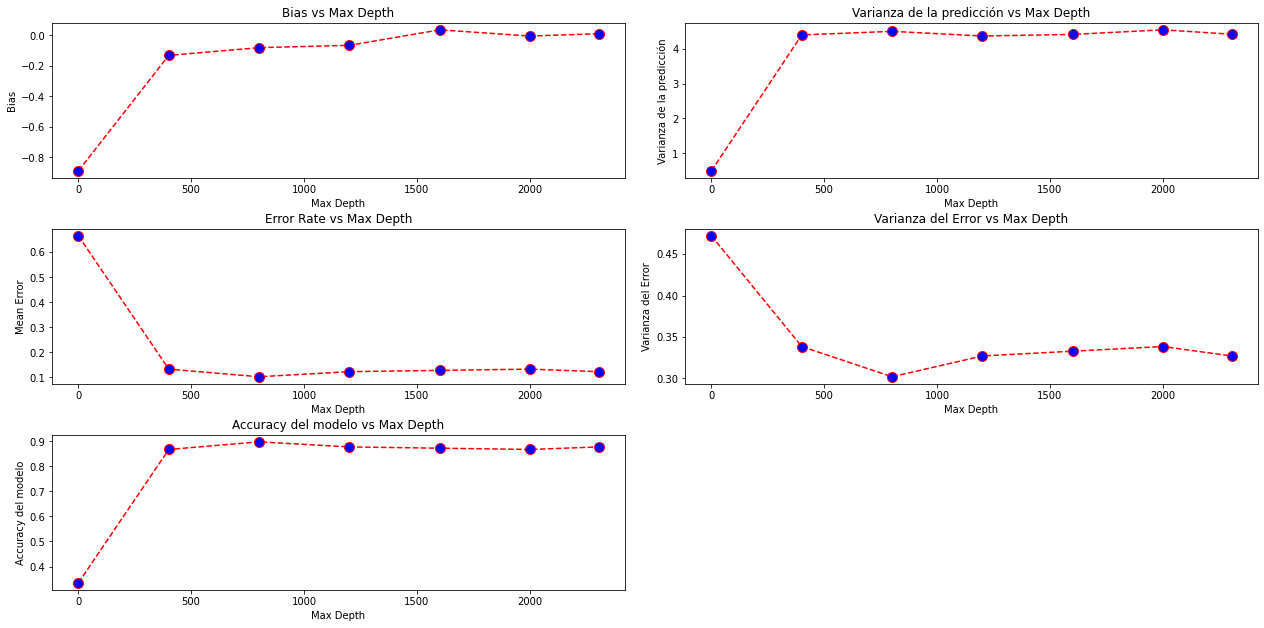

In [21]:
plot_graphs(depths, error_list, varError, bias_list, variance_list, accuracy_list)

## Entropy

In [22]:
depths, error_list, varError, bias_list, variance_list, accuracy_list = try_decision_tree("entropy")

[1, 401, 801, 1201, 1601, 2001, 2305]
Criterion: GINI, Max Depth: 1
Error: 0.5989847715736041
Accuracy: 0.4010152284263959

Criterion: GINI, Max Depth: 401
Error: 0.18781725888324874
Accuracy: 0.8121827411167513

Criterion: GINI, Max Depth: 801
Error: 0.15736040609137056
Accuracy: 0.8426395939086294

Criterion: GINI, Max Depth: 1201
Error: 0.16243654822335024
Accuracy: 0.8375634517766497

Criterion: GINI, Max Depth: 1601
Error: 0.17766497461928935
Accuracy: 0.8223350253807107

Criterion: GINI, Max Depth: 2001
Error: 0.16243654822335024
Accuracy: 0.8375634517766497

Criterion: GINI, Max Depth: 2305
Error: 0.17258883248730963
Accuracy: 0.8274111675126904



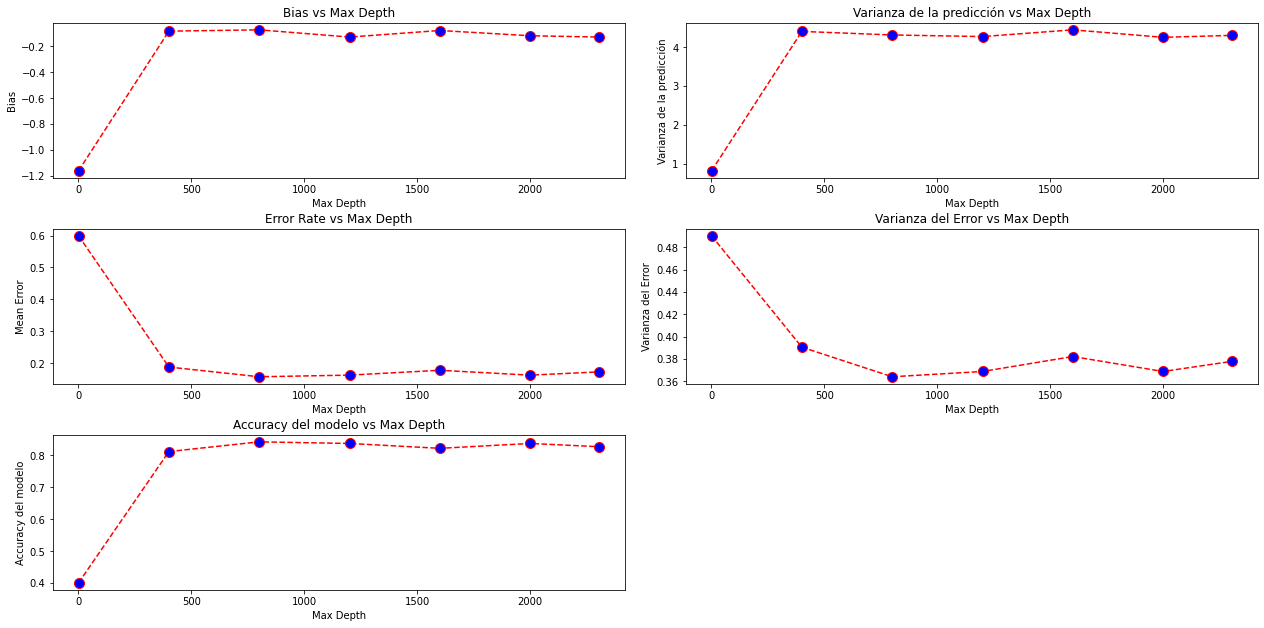

In [23]:
plot_graphs(depths, error_list, varError, bias_list, variance_list, accuracy_list)

## Trying max depths between 400 and 800

In [24]:
depths, error_list, varError, bias_list, variance_list, accuracy_list = try_decision_tree("gini", range(300, 801, 50))

range(300, 801, 50)
Criterion: GINI, Max Depth: 300
Error: 0.1116751269035533
Accuracy: 0.8883248730964467

Criterion: GINI, Max Depth: 350
Error: 0.1116751269035533
Accuracy: 0.8883248730964467

Criterion: GINI, Max Depth: 400
Error: 0.116751269035533
Accuracy: 0.883248730964467

Criterion: GINI, Max Depth: 450
Error: 0.116751269035533
Accuracy: 0.883248730964467

Criterion: GINI, Max Depth: 500
Error: 0.116751269035533
Accuracy: 0.883248730964467

Criterion: GINI, Max Depth: 550
Error: 0.09644670050761421
Accuracy: 0.9035532994923858

Criterion: GINI, Max Depth: 600
Error: 0.1065989847715736
Accuracy: 0.8934010152284264

Criterion: GINI, Max Depth: 650
Error: 0.10152284263959391
Accuracy: 0.8984771573604061

Criterion: GINI, Max Depth: 700
Error: 0.1116751269035533
Accuracy: 0.8883248730964467

Criterion: GINI, Max Depth: 750
Error: 0.08629441624365482
Accuracy: 0.9137055837563451

Criterion: GINI, Max Depth: 800
Error: 0.116751269035533
Accuracy: 0.883248730964467



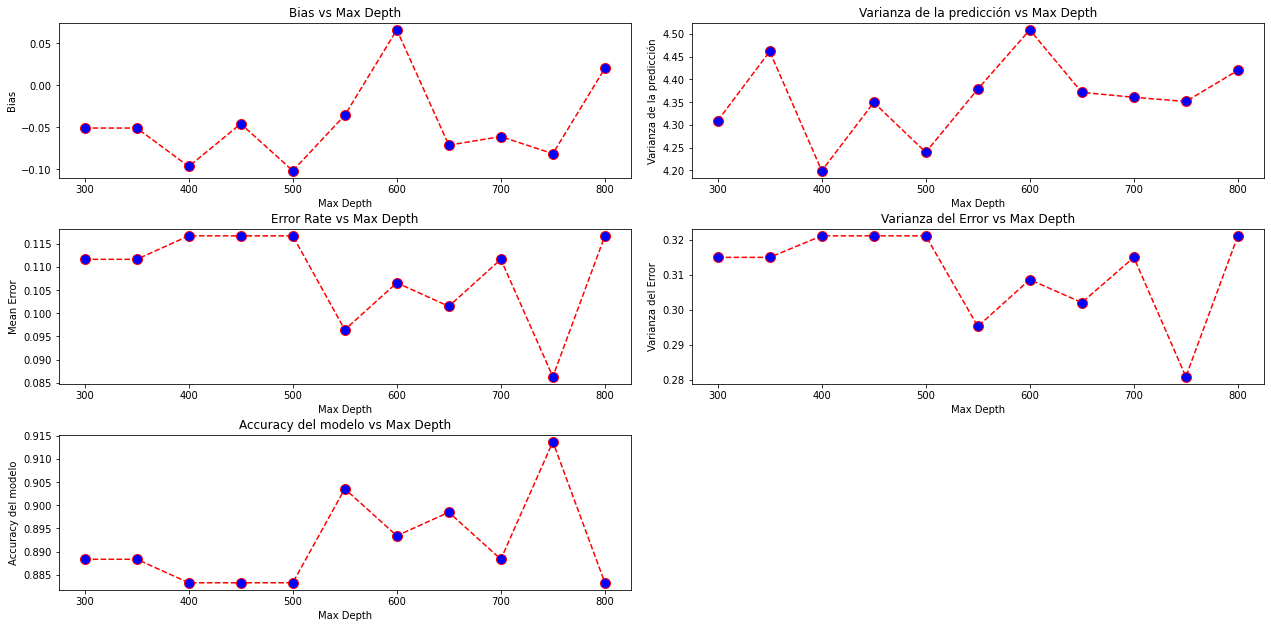

In [25]:
plot_graphs(depths, error_list, varError, bias_list, variance_list, accuracy_list)

###*K-fold:* 

In [33]:
def kfold(max_depth, n_splits): 
  decisiont_tree_kf = DecisionTreeClassifier(max_depth=max_depth)
  decision_tree_scores = cross_val_score(decisiont_tree_kf, X,np.ravel(y), cv=KFold(n_splits=n_splits,shuffle = True))
  decisiont_tree_kf.fit(X_train, np.ravel(y_train))
  predictions = decisiont_tree_kf.predict(X_test)
  b,e,ve,v = error_y_bias(predictions,y_test)
  print('****************')
  print('K-fold Cross validation con ',n_splits,' splits')
  print('  Ejecutando DecisionTreeClassifier con ', max_depth,' max_depth y se obtuvo:')
  print("    - %0.2f bias con varianza de %0.2f" % (b, v))
  print("    - %0.2f error con varianza de %0.2f" % (e, ve))
  print("    - %0.2f accuracy score con desviación estándar de %0.2f" % (decision_tree_scores.mean(), decision_tree_scores.std()))
  print('****************')

In [34]:
%%time
kfold(max_depth=500, n_splits=5)

****************
K-fold Cross validation con  5  splits
  Ejecutando DecisionTreeClassifier con  500  max_depth y se obtuvo:
    - -0.08 bias con varianza de 4.33
    - 0.11 error con varianza de 0.31
    - 0.83 accuracy score con desviación estándar de 0.01
****************
CPU times: user 7.06 s, sys: 9.52 ms, total: 7.07 s
Wall time: 7.07 s


In [35]:
%time
kfold(max_depth=550, n_splits=5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
****************
K-fold Cross validation con  5  splits
  Ejecutando DecisionTreeClassifier con  550  max_depth y se obtuvo:
    - -0.09 bias con varianza de 4.42
    - 0.09 error con varianza de 0.29
    - 0.84 accuracy score con desviación estándar de 0.03
****************


In [36]:
%%time
kfold(max_depth=600, n_splits=5)

****************
K-fold Cross validation con  5  splits
  Ejecutando DecisionTreeClassifier con  600  max_depth y se obtuvo:
    - -0.07 bias con varianza de 4.42
    - 0.13 error con varianza de 0.34
    - 0.83 accuracy score con desviación estándar de 0.02
****************
CPU times: user 7.06 s, sys: 12.4 ms, total: 7.07 s
Wall time: 7.04 s


###*Bootstrap:*

In [37]:
def bootstrap(max_depth, n_iterations):   
  n_size = int(len(X) * (1 - test_size)) 
  values = df_images.values
  bo_scores = list()
  for i in range(n_iterations):
      train = resample(values, n_samples = n_size, replace=True, stratify=y) 
      test = np.array([s for s in values if s.tolist() not in train.tolist()]) 
      decisiont_tree_bo = DecisionTreeClassifier(criterion="gini", max_depth=max_depth)
      decisiont_tree_bo.fit(train[:,:-1], train[:,-1])
      predictions = decisiont_tree_bo.predict(test[:,:-1]) 
      score = accuracy_score(test[:,-1], predictions) 
      bo_scores.append(score)
      b,e,ve,v = error_y_bias(predictions,test[:,-1])
  
  print('****************')
  print('Bootstrap Cross validation con ',n_iterations,' iteraciones')
  print('  Ejecutando DecisionTreeClassifier con ',max_depth,' neighbors y se obtuvo:')
  print("    - %0.2f bias con varianza de %0.2f" % (b, v))
  print("    - %0.2f error con varianza de %0.2f" % (e, ve))
  print("    - %0.2f accuracy score con desviación estándar de %0.2f" % (np.mean(bo_scores), np.std(bo_scores)))
  print('****************')


In [38]:
%%time
bootstrap(max_depth=500, n_iterations=4)

****************
Bootstrap Cross validation con  4  iteraciones
  Ejecutando DecisionTreeClassifier con  500  neighbors y se obtuvo:
    - -0.11 bias con varianza de 4.67
    - 0.22 error con varianza de 0.42
    - 0.77 accuracy score con desviación estándar de 0.01
****************
CPU times: user 4min 15s, sys: 1.72 s, total: 4min 17s
Wall time: 4min 16s


In [39]:
%%time
bootstrap(max_depth=550, n_iterations=4)

****************
Bootstrap Cross validation con  4  iteraciones
  Ejecutando DecisionTreeClassifier con  550  neighbors y se obtuvo:
    - -0.13 bias con varianza de 4.36
    - 0.25 error con varianza de 0.43
    - 0.76 accuracy score con desviación estándar de 0.03
****************
CPU times: user 4min 29s, sys: 901 ms, total: 4min 30s
Wall time: 4min 29s


In [40]:
%%time
bootstrap(max_depth=550, n_iterations=4)

****************
Bootstrap Cross validation con  4  iteraciones
  Ejecutando DecisionTreeClassifier con  550  neighbors y se obtuvo:
    - 0.13 bias con varianza de 4.49
    - 0.22 error con varianza de 0.42
    - 0.76 accuracy score con desviación estándar de 0.02
****************
CPU times: user 4min 41s, sys: 938 ms, total: 4min 42s
Wall time: 4min 42s


6. Determinar el error, el bias y la varianza del Error.
https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/

7. Crear una matriz de confusion y analizar los resultados.

In [41]:
decision_tree = decision_tree_model(X, y, criterion="gini", max_depth=550)
y_pred = decision_tree.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.868020304568528

In [43]:
b,e,ve,v = error_y_bias(y_pred,y_test)
print("El bias calculado es %0.2f" %b)
print("El error calculado es %0.2f" %e)
print("La varianza del error es %0.2f" %ve)
print("La varianza es %0.2f" %v)


El bias calculado es -0.11
El error calculado es 0.13
La varianza del error es 0.34
La varianza es 4.32


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        29
         1.0       0.87      0.81      0.84        16
         2.0       0.91      0.83      0.87        36
         3.0       0.42      1.00      0.59         5
         4.0       0.86      0.90      0.88        42
         5.0       0.79      0.79      0.79        14
         6.0       0.91      0.91      0.91        55

    accuracy                           0.87       197
   macro avg       0.82      0.87      0.83       197
weighted avg       0.89      0.87      0.87       197



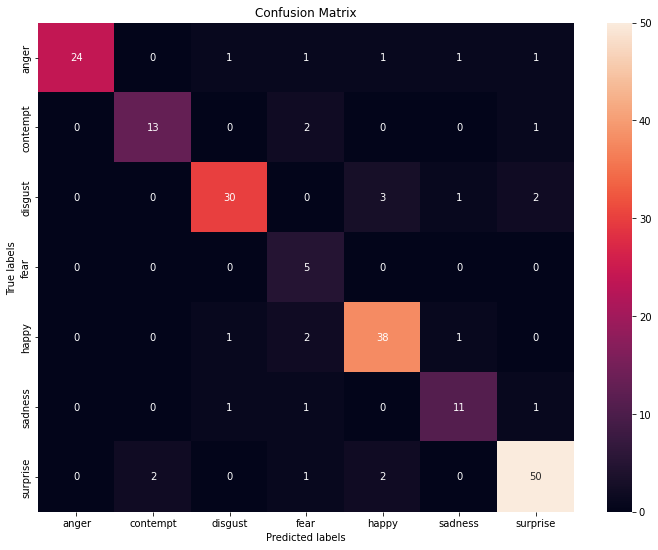

In [45]:
#ax= plt.subplot()
fig, ax= plt.subplots(figsize=(12,9))

#fig, axs = plt.subplots(3, 2,figsize=(18,9))
#fig.tight_layout(pad=3.0)

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']); 
ax.yaxis.set_ticklabels(['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']);

*   0: anger
*   1: contempt
*   2: disgust
*   3: fear
*   4: happy
*   5: sadness
*   6: surprise
